In [1]:
import pandas as pd
import gensim
from gensim.models import CoherenceModel

import matplotlib.pyplot as plt
from pprint import pprint

import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
import numpy as np
import tqdm

In [ ]:
restaurant_review_df = pd.read_csv('concat_reviews_by_restaurant.csv')

## LDA

In [36]:
# create dictionary
docs = restaurant_review_df['cleaned_text']
processed_docs = [d.split() for d in docs]
dictionary = gensim.corpora.Dictionary(processed_docs)

In [37]:
len(processed_docs)

845

In [38]:
# term document frequency
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [40]:
len(bow_corpus)

845

In [41]:
lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                       id2word=dictionary,
                                       num_topics=10,
                                       alpha=0.1, # document topic density. higher alpha, documents composed of more topics
                                       eta=0.01, # topic word density. higher beta, topics composed of large number of words in the corpus
                                       chunksize=100, # number of documents to consider at once
                                       passes=10, # number of times to go through the entire corpus
                                       random_state =100)

In [42]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[bow_corpus]

[(0,
  '0.010*"pasta" + 0.008*"dish" + 0.008*"good" + 0.008*"sauce" + 0.007*"taste" '
  '+ 0.007*"flavour" + 0.006*"rice" + 0.005*"like" + 0.005*"food" + '
  '0.005*"salmon"'),
 (1,
  '0.011*"chicken" + 0.009*"sauce" + 0.009*"fry" + 0.008*"dish" + '
  '0.006*"flavour" + 0.006*"good" + 0.006*"rice" + 0.005*"taste" + '
  '0.005*"sweet" + 0.005*"serve"'),
 (2,
  '0.011*"prawn" + 0.008*"flavour" + 0.007*"taste" + 0.007*"good" + '
  '0.006*"noodle" + 0.006*"dish" + 0.006*"like" + 0.006*"pork" + 0.005*"serve" '
  '+ 0.005*"sweet"'),
 (3,
  '0.013*"tea" + 0.006*"sweet" + 0.006*"good" + 0.006*"cream" + 0.005*"taste" '
  '+ 0.005*"dish" + 0.005*"like" + 0.005*"afternoon" + 0.004*"set" + '
  '0.004*"bowl"'),
 (4,
  '0.011*"egg" + 0.010*"good" + 0.008*"like" + 0.007*"bread" + 0.007*"pork" + '
  '0.007*"taste" + 0.006*"sauce" + 0.006*"try" + 0.006*"dish" + '
  '0.005*"flavour"'),
 (5,
  '0.010*"noodle" + 0.010*"pork" + 0.009*"rice" + 0.008*"dish" + 0.008*"soup" '
  '+ 0.008*"good" + 0.008*"fry" + 

In [43]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
lda_score = coherence_model_lda.get_coherence()
lda_score

0.31804833792287174

In [44]:
def compute_coherence_values(k):
    
    lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=k,
                                           alpha=0.1, # document topic density. higher alpha, documents composed of more topics
                                           eta=0.01, # topic word density. higher beta, topics composed of large number of words in the corpus
                                           chunksize=100, # number of documents to consider at once
                                           passes=10, # number of times to go through the entire corpus
                                           random_state =100)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [45]:
# grid = {}
# grid['Validation_Set'] = {}

# # Topics range
# min_topics = 2
# max_topics = 11
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)

# # Alpha parameter
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')

# # Beta parameter
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')


# model_results = {
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }

# # Can take a long time to run
# if 1 == 1:
#     pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)))
    
#     # iterate through number of topics
#     for k in topics_range:
#         # iterate through alpha values
#         for a in alpha:
#             # iterare through beta values
#             for b in beta:
#                 # get the coherence score for the given parameters
#                 cv = compute_coherence_values(k=k, a=a, b=b)
#                 # Save the model results
#                 model_results['Topics'].append(k)
#                 model_results['Alpha'].append(a)
#                 model_results['Beta'].append(b)
#                 model_results['Coherence'].append(cv)
                
#                 pbar.update(1)
#     pd.DataFrame(model_results).to_csv('restaurant_lda_tuning_results.csv', index=False)
#     pbar.close()

In [46]:
# iterate through number of topics
coherence_values = []
topics_range = range(2,11,1)

for k in topics_range:
    value = compute_coherence_values(k)
    print(k)
    print(value)
    coherence_values.append(value)

2
0.32108819932159033
3
0.3089515104691282
4
0.32808673620655604
5
0.30178412256965637
6
0.33741894570673875
7
0.3316808192512459
8
0.3223307679581065
9
0.316250749389001
10
0.31804833792287174


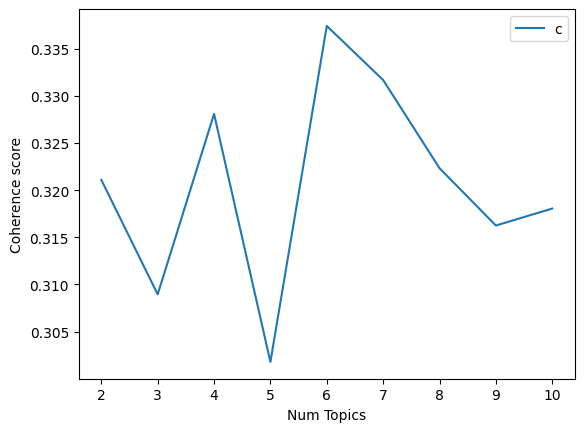

In [47]:
# Show graph
plt.plot(topics_range, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [80]:
# optimal parameters
num_topics = 4 ### CHANGE THIS

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                        id2word=dictionary,
                                        num_topics=num_topics,
                                        alpha=0.1, # document topic density. higher alpha, documents composed of more topics
                                        eta=0.01, # topic word density. higher beta, topics composed of large number of words in the corpus
                                        chunksize=100, # number of documents to consider at once
                                        passes=10, # number of times to go through the entire corpus
                                        random_state =100)
# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[bow_corpus]

[(0,
  '0.009*"good" + 0.008*"taste" + 0.007*"dish" + 0.007*"pasta" + 0.007*"sauce" '
  '+ 0.006*"like" + 0.006*"flavour" + 0.005*"food" + 0.005*"try" + '
  '0.005*"cream"'),
 (1,
  '0.009*"sauce" + 0.008*"fry" + 0.008*"chicken" + 0.008*"dish" + 0.007*"good" '
  '+ 0.007*"rice" + 0.006*"pork" + 0.006*"taste" + 0.006*"like" + '
  '0.005*"flavour"'),
 (2,
  '0.008*"good" + 0.008*"flavour" + 0.008*"taste" + 0.008*"like" + '
  '0.006*"sweet" + 0.006*"try" + 0.006*"egg" + 0.005*"pork" + 0.005*"noodle" + '
  '0.005*"cream"'),
 (3,
  '0.009*"tea" + 0.008*"taste" + 0.007*"sweet" + 0.006*"good" + 0.006*"like" + '
  '0.006*"flavour" + 0.005*"cream" + 0.005*"drink" + 0.005*"try" + '
  '0.004*"coffee"')]


In [81]:
# Visualize the topics 
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('restaurant_ldavis_prepared_'+str(num_topics)+'_12apr_final')
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'restaurant_ldavis_prepared_'+ str(num_topics) +'_12apr_final.html')
LDAvis_prepared

### https://we1s.ucsb.edu/research/we1s-tools-and-software/topic-model-observatory/tmo-guide/tmo-guide-pyldavis/
# A “relevance metric” slider scale at the top of the right panel controls how the words for a topic are sorted.
# lambda 1: sorts words by their frequency in the topic (red bars)
# lambda 0: sorts words by their "lift". Words whose red bars are nearly as long as their blue bars will be at the top Lift means how much a word's frequency sticks out in a topic above the baseline of its overall frequency in the model

/Users/natalie/opt/anaconda3/envs/bt4221/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.046148  0.040118       1        1  35.161118
2      0.002612 -0.033524       2        1  29.062220
0     -0.022992 -0.026560       3        1  22.506577
3      0.066528  0.019965       4        1  13.270085, topic_info=        Term         Freq        Total Category  logprob  loglift
445      tea  2339.000000  2339.000000  Default  30.0000  30.0000
2061   pasta  2159.000000  2159.000000  Default  29.0000  29.0000
102    cream  4038.000000  4038.000000  Default  28.0000  28.0000
2542   pizza  1092.000000  1092.000000  Default  27.0000  27.0000
132    drink  2006.000000  2006.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
578      egg   440.848241  4895.342100   Topic4  -5.8078  -0.3877
382    serve   426.529085  4473.777685   Topic4  -5.8409  -0.3307
340   pretty   401.412149  3330.212400   Topic4  -5.9015  -0.0961
293     nice   385.832307  3052.396516   Topic4  -5.9411  -0.0486
374    sauce   393.210981  6716.991918   Topic4  -5.9222  -0.8184

[500 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
32142      1  0.979014    1430
26811      1  0.979061    1946
17998      2  0.958731     2gr
19432      3  0.951483    3780
22093      4  1.020136    5500
...      ...       ...     ...
31707      2  1.034427  𝙏𝙤𝙗𝙞𝙠𝙤
32863      2  0.942540   𝙒𝙖𝙩𝙘𝙝
29430      4  1.020598   𝟖𝟖𝐩𝐞𝐫
40925      2  0.962759     𝟱𝟲𝟳
40925      3  0.034384     𝟱𝟲𝟳

[1024 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])

In [82]:
# allocate each restaurant to a topic
topics = []
for topic_bow in bow_corpus:
    topic_prob_list = sorted(lda_model.get_document_topics(topic_bow), key=lambda tup:tup[1], reverse=True)
    highest_prob_topic = topic_prob_list[0][0]
    topics.append(highest_prob_topic)

In [83]:
restaurant_review_df['topics'] = topics

print(restaurant_review_df['topics'].value_counts())

restaurant_review_df_encoded = restaurant_review_df.drop(['name', 'cleaned_text', 'price', 'categories', 'user', 'date', 'cleaned_categories'], axis=1)

# one hot encode region & topics
region_dummies = pd.get_dummies(restaurant_review_df_encoded['region'])
neighbourhood_dummies = pd.get_dummies(restaurant_review_df_encoded['neighbourhood'])
topic_dummies = pd.get_dummies(restaurant_review_df_encoded['topics'])

restaurant_review_df_encoded = restaurant_review_df_encoded.drop(['region', 'neighbourhood', 'topics'], axis=1)
restaurant_review_df_encoded = restaurant_review_df_encoded.join(region_dummies)
restaurant_review_df_encoded = restaurant_review_df_encoded.join(neighbourhood_dummies)
restaurant_review_df_encoded = restaurant_review_df_encoded.join(topic_dummies)

restaurant_review_df_encoded.to_csv('lda_labelled_restaurants_' + str(num_topics) +'.csv') 

1    329
2    229
0    178
3    109
Name: topics, dtype: int64
